In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Earthquake Intensity Map

Measuring the impact felt by an earthquake in Morocco is the foundation to analysing the damage incurred in Morocco. This section shows maps of Earthquake Intensity felt in different parts of the country. 

## Data

Earthquake Intensity Data was obtained from [USGS](https://earthquake.usgs.gov/earthquakes/eventpage/us7000kufc/shakemap/intensity) and was overlayed with shapefiles of Morocco admin regions taken from [UNOCHA](https://data.humdata.org/dataset/cod-ab-mar?) and from GADM[https://gadm.org/download_country.html]. This can be used as a baseline map upon which other indicators can be visualized. 

## Methodology

The impact of the earthquake in this situation is measured using the Modified Mercelli Intensity Scale (mmi). 

The effect of an earthquake on the Earth's surface is called the intensity. The intensity scale consists of a series of certain key responses such as people awakening, movement of furniture, damage to chimneys, and finally - total destruction. Although numerousintensity scales have been developed over the last several hundred years to evaluate the effects of earthquakes, the one currently used in the United States is the Modified Mercalli (MM) Intensity Scale. It was developed in 1931 by the American seismologists Harry Wood and Frank Neumann. This scale, composed of increasing levels of intensity that range from imperceptible shaking to catastrophic destruction, is designated by Roman numerals. It does not have a mathematical basis; instead it is an arbitrary ranking based on observed effects.

The Modified Mercalli Intensity value assigned to a specific site after an earthquake has a more meaningful measure of severity to the nonscientist than the magnitude because intensity refers to the effects actually experienced at that place.

The lower numbers of the intensity scale generally deal with the manner in which the earthquake is felt by people. The higher numbers of the scale are based on observed structural damage. Structural engineers usually contribute information for assigning intensity values of VIII or above.

Source: [USGS Modified Mercelli Intensity Scale](https://www.usgs.gov/programs/earthquake-hazards/modified-mercalli-intensity-scale#:~:text=The%20effect%20of%20an%20earthquake,%2C%20and%20finally%20%2D%20total%20destruction.)

Alternatively, another variable that can be used is also the distance from the epicenter. 

## Results

In [2]:
mi_sep8 = gpd.read_file('../../data/earthquake/shape/mi.shp')

In [3]:
morocco_adm2 = gpd.read_file('../../data/shapefiles/mar_adm2.shp')
morocco_adm1 = gpd.read_file('../../data/shapefiles/mar_adm1.shp')

In [37]:
morocco_adm2 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_2.shp')
morocco_adm3 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_3.shp')
morocco_adm4= gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_4.shp')

In [112]:
gdf_adm2 = morocco_adm2[['NAME_2', 'NAME_1', 'geometry']].sjoin(mi_sep8[['PARAMVALUE', 'geometry']])
gdf_adm3 = morocco_adm3[['NAME_3','NAME_2','NAME_1', 'geometry']].sjoin(mi_sep8[['PARAMVALUE', 'geometry']])
gdf_adm4 = morocco_adm4[['NAME_4','NAME_3','NAME_2','NAME_1','geometry']].sjoin(mi_sep8[['PARAMVALUE', 'geometry']])

In [84]:
df_adm3 = gdf_adm3.groupby(['NAME_3','NAME_2','NAME_1']).mean('PARAMVALUE').reset_index()[[ 'NAME_3','NAME_2','NAME_1','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)
df_adm4 = gdf_adm4.groupby([ 'NAME_4','NAME_3','NAME_2','NAME_1']).mean('PARAMVALUE').reset_index()[['NAME_4','NAME_3','NAME_2','NAME_1','PARAMVALUE']].sort_values(by='PARAMVALUE', ascending = False)


In [86]:
df_adm3.to_csv('../../data/earthquake/earthquake_intensity_adm3_gadm.csv')
df_adm4.to_csv('../../data/earthquake/earthquake_intensity_adm4_gadm.csv')

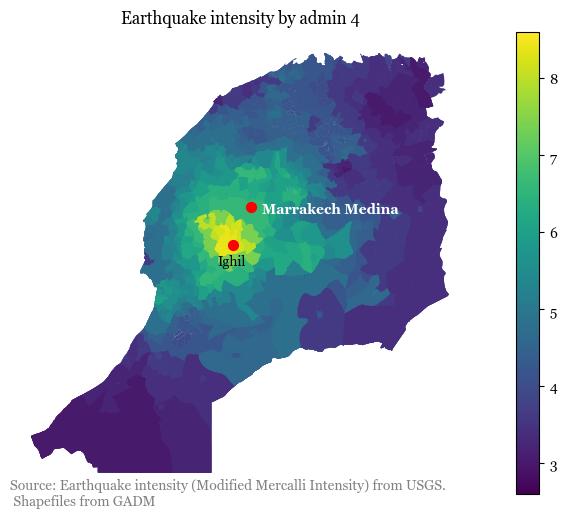

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams["font.family"] = "Georgia"

gdf=gdf_adm4

vmin = gdf['PARAMVALUE'].min()
vmax = gdf['PARAMVALUE'].max()

gdf.plot(column='PARAMVALUE', cmap = 'viridis', ax=ax, vmax=vmax, legend = True)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

text_to_add = gdf_adm4[gdf_adm4['PARAMVALUE']== gdf_adm4['PARAMVALUE'].max()]['NAME_4'].iloc[0]
x, y =gdf_adm4[gdf_adm4['PARAMVALUE']== gdf_adm4['PARAMVALUE'].max()]['geometry'].iloc[0].centroid.x, gdf_adm4[gdf_adm4['PARAMVALUE']== gdf_adm4['PARAMVALUE'].max()]['geometry'].iloc[0].centroid.y

ax.scatter(x, y, c='red', marker='o', s=50, label=text_to_add)
# Use the annotate function to add the text to the map
ax.annotate(text_to_add, xy=(x-0.5, y-0.5), xytext=(10, 10), textcoords='offset points',
            fontsize=10, color='black')

text_to_add = gdf_adm4[gdf_adm4['NAME_4']== 'Marrakech Medina']['NAME_4'].iloc[0]
x, y =gdf_adm4[gdf_adm4['NAME_4']== 'Marrakech Medina']['geometry'].iloc[0].centroid.x, gdf_adm4[gdf_adm4['NAME_4']== 'Marrakech Medina']['geometry'].iloc[0].centroid.y

ax.scatter(x, y, c='red', marker='o', s=50, label=text_to_add)

# Use the annotate function to add the text to the map
ax.annotate(text_to_add, xy=(x-0.05, y-0.3), xytext=(10, 10), textcoords='offset points',
            fontsize=10, color='white', weight='bold')


# sm = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=vmin, vmax=vmax))


# divider = make_axes_locatable(ax)
# dvider_kwargs = dict(position="left", size="1.5%", pad=0)
# fig.colorbar(sm, cax=divider.append_axes(**dvider_kwargs),
#              #format = matplotlib.ticker.FuncFormatter(lambda x, pos: ''),
#              #ticks = matplotlib.ticker.FixedLocator([])
#              )

plt.title('Earthquake intensity by admin 4')

subtitle = f'Source: Earthquake intensity (Modified Mercalli Intensity) from USGS.\n Shapefiles from GADM'

ax.text(0, 0, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='gray', weight='normal')

plt.savefig('../../docs/images/01_earthquake_intensity_adm4.png')

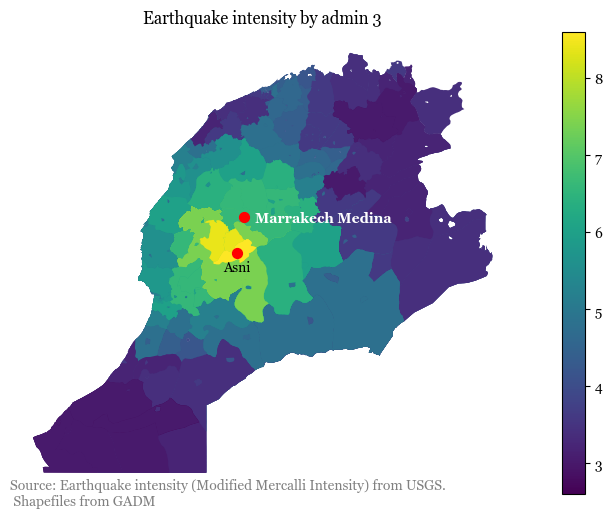

In [106]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams["font.family"] = "Georgia"

gdf=gdf_adm3

vmin = gdf['PARAMVALUE'].min()
vmax = gdf['PARAMVALUE'].max()

gdf.plot(column='PARAMVALUE', cmap = 'viridis', ax=ax, vmax=vmax, legend = True)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])


# sm = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=vmin, vmax=vmax))

text_to_add = gdf_adm3[gdf_adm3['PARAMVALUE']== gdf_adm3['PARAMVALUE'].max()]['NAME_3'].iloc[0]
x, y =gdf_adm3[gdf_adm3['PARAMVALUE']== gdf_adm3['PARAMVALUE'].max()]['geometry'].iloc[0].centroid.x, gdf_adm3[gdf_adm3['PARAMVALUE']== gdf_adm3['PARAMVALUE'].max()]['geometry'].iloc[0].centroid.y

ax.scatter(x, y, c='red', marker='o', s=50, label=text_to_add)
# Use the annotate function to add the text to the map
ax.annotate(text_to_add, xy=(x-0.5, y-0.5), xytext=(10, 10), textcoords='offset points',
            fontsize=10, color='black')

text_to_add = gdf_adm3[gdf_adm3['NAME_3']== 'NA (Marrakech Medina)']['NAME_3'].iloc[0]
x, y =gdf_adm3[gdf_adm3['NAME_3']== 'NA (Marrakech Medina)']['geometry'].iloc[0].centroid.x, gdf_adm3[gdf_adm3['NAME_3']== 'NA (Marrakech Medina)']['geometry'].iloc[0].centroid.y

ax.scatter(x, y, c='red', marker='o', s=50, label='Marrakech Medina')

# Use the annotate function to add the text to the map
ax.annotate('Marrakech Medina', xy=(x-0.05, y-0.3), xytext=(10, 10), textcoords='offset points',
            fontsize=10, color='white', weight='bold')


# divider = make_axes_locatable(ax)
# dvider_kwargs = dict(position="left", size="1.5%", pad=0)
# fig.colorbar(sm, cax=divider.append_axes(**dvider_kwargs),
#              #format = matplotlib.ticker.FuncFormatter(lambda x, pos: ''),
#              #ticks = matplotlib.ticker.FixedLocator([])
#              )

plt.title('Earthquake intensity by admin 3')

subtitle = f'Source: Earthquake intensity (Modified Mercalli Intensity) from USGS.\n Shapefiles from GADM'

ax.text(0, 0, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='gray', weight='normal')

plt.savefig('../../docs/images/01_earthquake_intensity_adm3.png')